In [4]:
import pyteomics.mzml
import spectrum_utils.spectrum as sus
import matplotlib.pyplot as plt
import spectrum_utils.plot as sup
import spectrum_utils.iplot as isup
import pandas as pd

In [5]:
def get_spec(my_scan, my_peptide, mzml):
    my_id = 'controllerType=0 controllerNumber=1 scan='+ my_scan
    spectrum_dict = mzml.get_by_id(my_id)
    
    
    spectrum_id = spectrum_dict['id']
    mz_array = spectrum_dict['m/z array']
    intensity_array = spectrum_dict['intensity array']
    retention_time = (spectrum_dict['scanList']['scan'][0].get('scan start time', -1))
    precursor = spectrum_dict['precursorList']['precursor'][0]
    precursor_ion = precursor['selectedIonList']['selectedIon'][0]
    precursor_mz = precursor_ion['selected ion m/z']

    if 'charge state' in precursor_ion:
        precursor_charge = int(precursor_ion['charge state'])
    elif 'possible charge state' in precursor_ion:
        precursor_charge = int(precursor_ion['possible charge state'])
    else:
        raise ValueError('Unknown precursor charge')

    scan_num = spectrum_dict["id"][spectrum_dict["id"].find('scan=') + 5:]
    ms_level = spectrum_dict["ms level"]
    total_ion_curr = spectrum_dict["total ion current"]
    ion_time = spectrum_dict["scanList"]['scan'][0]["ion injection time"]

    spectrum = sus.MsmsSpectrum(spectrum_id, precursor_mz, precursor_charge,
                        mz_array, intensity_array, None, retention_time, peptide=my_peptide)
 
    # Process the MS/MS spectrum.
    fragment_tol_mass = 50
    fragment_tol_mode = 'ppm'    
    spectrum = (spectrum.annotate_peptide_fragments(fragment_tol_mass, fragment_tol_mode,
                                            ion_types='by',max_ion_charge=2))
    
    return spectrum

In [6]:
mzml_2ng1 = pyteomics.mzml.MzML('/Volumes/LaCie/SingleCellSpectra copy for true single cell/data/mzMLs/Ex_Auto_J3_30umTB_2ngQC_60m_1.mzML')
mzml_bulk1 = pyteomics.mzml.MzML('/Volumes/LaCie/SingleCellSpectra copy for true single cell/data/mzMLs/OR11_20160122_PG_HeLa_CVB3_CT_A.mzML')

/var/folders/zk/jc657sbs27l7_q82ygdlvxxc0000gp/T/ipykernel_36615/2335018568.py:12: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False, which='both')


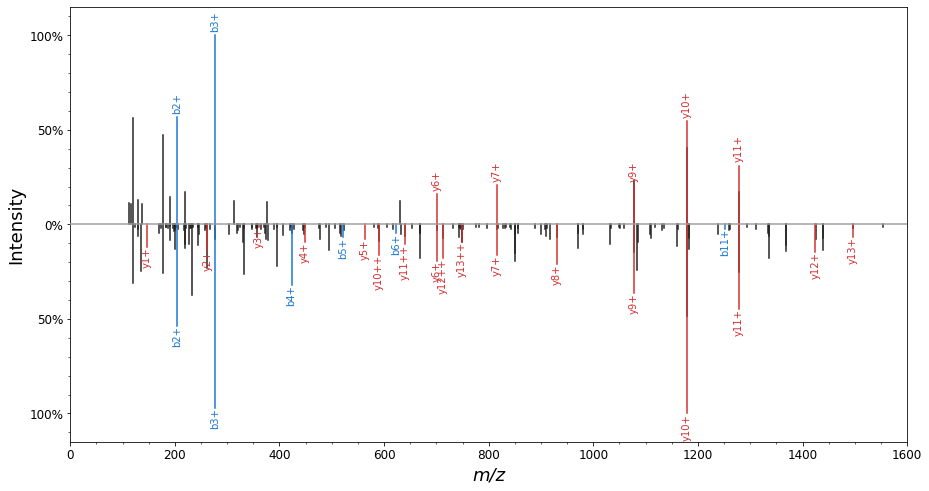

In [11]:
peptide ='GFAFVTFDDHDSVDK'
spectrum_bulk = get_spec('85781',peptide,mzml_bulk1)
spectrum_sc = get_spec('26417',peptide ,mzml_2ng1)

fig, ax = plt.subplots(figsize=(15, 8))
sup.mirror(spectrum_sc,
           spectrum_bulk,
           ax=ax)
plt.xlim(0, 1600)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.grid(b=False, which='both')
plt.xlabel('m/z', fontsize=18)
plt.ylabel('Intensity', fontsize=18)
plt.savefig('mirror_plot.png', dpi=600)
plt.show()

In [6]:
#get comparisons
all_combos = pd.read_csv('/Volumes/LaCie/SingleCellSpectra/data/list_of_spectra_to_compare/all_combos.tsv', sep='\t')


In [7]:
b_v_2 = all_combos[all_combos['type']=='2ng good vs bulk good']
bv2 = b_v_2[(b_v_2['File1'] =='Ex_Auto_J3_30umTB_2ngQC_60m_1') &(b_v_2['File2'] =='OR11_20160122_PG_HeLa_CVB3_CT_A')]

In [21]:
bv2['peptide_charge'].unique()[3000:3050]

array(['ITESVAETAQTIK_2.0', 'ITFDAFPGEPDK_2.0', 'ITFLLQAIR_2.0',
       'ITGEAFVQFASQELAEK_2.0', 'ITHQIVDRPGQQTSVIGR_4.0',
       'ITIGQAPTEK_2.0', 'ITITNDQNR_2.0', 'ITLDNAYMEK_2.0',
       'ITLDNAYM[Common Variable:Oxidation on M]EK_2.0',
       'ITLPVDFVTADK_2.0', 'ITLQDVVSHSK_3.0', 'ITLVSAAPGK_2.0',
       'ITMIAEPLEK_2.0', 'ITNDFYPEEDGK_2.0', 'ITPAHDQNDYEVGQR_3.0',
       'ITPSYVAFTPEGER_2.0', 'ITPSYVAFTPEGER_3.0', 'ITQDIFQQLLK_2.0',
       'ITQLTPFNGYAGAK_2.0', 'ITQSNAILR_2.0', 'ITSEALLVTQQLVK_2.0',
       'ITSEIPQTER_2.0', 'ITSGPFEPDLYK_2.0', 'ITSPLMEPSSIEK_2.0',
       'ITTGAQDDLRK_3.0', 'ITVLEALR_2.0', 'ITVTSEVPFSK_2.0',
       'IVADFSASVK_2.0', 'IVAEEFLK_2.0', 'IVAERPGTNSTGPAPMAPPR_3.0',
       'IVAETMNNYLFGER_2.0', 'IVAIGTSDLDK_2.0', 'IVALSSSLSNAK_2.0',
       'IVAPPGGR_2.0', 'IVDDWANDGWGLK_2.0', 'IVDPEIALK_2.0',
       'IVDVIGEK_2.0', 'IVEIPFNSTNK_2.0', 'IVEMSTSK_2.0',
       'IVEPYIAWGYPNLK_2.0', 'IVEVLLMK_2.0', 'IVFSGNLFQHQEDSK_3.0',
       'IVFVTGNAK_2.0', 'IVHAFDMEDLGDK_

In [22]:
bv2[bv2['peptide_charge']=='IVHAFDMEDLGDK_3.0']

,peptide_charge,Scan1,Prob1,File1,Scan2,Prob2,File2,type
611207,IVHAFDMEDLGDK_3.0,21879,0.0,Ex_Auto_J3_30umTB_2ngQC_60m_1,65269,0.000149,OR11_20160122_PG_HeLa_CVB3_CT_A,2ng good vs bulk good
611223,IVHAFDMEDLGDK_3.0,21866,0.0,Ex_Auto_J3_30umTB_2ngQC_60m_1,65269,0.000149,OR11_20160122_PG_HeLa_CVB3_CT_A,2ng good vs bulk good
611241,IVHAFDMEDLGDK_3.0,21879,0.0,Ex_Auto_J3_30umTB_2ngQC_60m_1,65613,0.000000,OR11_20160122_PG_HeLa_CVB3_CT_A,2ng good vs bulk good
611255,IVHAFDMEDLGDK_3.0,21879,0.0,Ex_Auto_J3_30umTB_2ngQC_60m_1,65202,0.000000,OR11_20160122_PG_HeLa_CVB3_CT_A,2ng good vs bulk good
611266,IVHAFDMEDLGDK_3.0,21879,0.0,Ex_Auto_J3_30umTB_2ngQC_60m_1,65618,0.000000,OR11_20160122_PG_HeLa_CVB3_CT_A,2ng good vs bulk good
611269,IVHAFDMEDLGDK_3.0,21866,0.0,Ex_Auto_J3_30umTB_2ngQC_60m_1,65202,0.000000,OR11_20160122_PG_HeLa_CVB3_CT_A,2ng good vs bulk good
611273,IVHAFDMEDLGDK_3.0,21866,0.0,Ex_Auto_J3_30umTB_2ngQC_60m_1,65618,0.000000,OR11_20160122_PG_HeLa_CVB3_CT_A,2ng good vs bulk good
611274,IVHAFDMEDLGDK_3.0,21866,0.0,Ex_Auto_J3_30umTB_2ngQC_60m_1,65613,0.000000,OR11_20160122_PG_HeLa_CVB3_CT_A,2ng good vs bulk good
611275,IVHAFDMEDLGDK_3.0,21866,0.0,Ex_Auto_J3_30umTB_2ngQC_60m_1,65867,0.000235,OR11_20160122_PG_HeLa_CVB3_CT_A,2ng good vs bulk good
611283,IVHAFDMEDLGDK_3.0,21879,0.0,Ex_Auto_J3_30umTB_2ngQC_60m_1,65867,0.000235,OR11_20160122_PG_HeLa_CVB3_CT_A,2ng good vs bulk good
